In [373]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split   # разделение выборки на train и test

from sklearn.model_selection import cross_val_score     # кросс-валидация
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
import xgboost as xgb, lightgbm as lgbm, catboost as catb

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler    # стандартизация данных
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler      # масштабирование MinMaxScaler
from sklearn.preprocessing import Normalizer        # масштабирование Normalizer
from sklearn.decomposition import PCA   # метод главных компонент

from sklearn.linear_model import LogisticRegression     # модели классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import VotingClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

In [374]:
# https://www.kaggle.com/c/geekbrains-competitive-data-analysis/overview

In [375]:
# пути
path_train = '/home/tefi/Tefi/Project_sport/train.csv'
path_test = '/home/tefi/Tefi/Project_sport/test.csv'
path_applications_history = '/home/tefi/Tefi/Project_sport/applications_history.csv'
path_bki = '/home/tefi/Tefi/Project_sport/bki.csv'
path_client_profile = '/home/tefi/Tefi/Project_sport/client_profile.csv'
path_payments = '/home/tefi/Tefi/Project_sport/payments.csv'
path_sample_submit = '/home/tefi/Tefi/Project_sport/sample_submit.csv'

# загрузка данных из файлов в соответствующие переменные
train_pro = pd.read_csv(path_train)
test_pro = pd.read_csv(path_test)
applications_history = pd.read_csv(path_applications_history)
bki = pd.read_csv(path_bki)
client_profile = pd.read_csv(path_client_profile)
payments = pd.read_csv(path_payments)
sample_submit = pd.read_csv(path_sample_submit)  # образец submit

Описание датасета:

APPLICATION_NUMBER - номер заявки
NAME_CONTRACT_TYPE - тип договора (наличные, карта)
TARGET - целевая переменная

История предыдущих заявок клиента:
PREV_APPLICATION_NUMBER - предыдущий номер заявки
AMOUNT_ANNUITY - сумма в год
AMT_APPLICATION - сумма заявки
AMOUNT_CREDIT - сумма кредита
AMOUNT_PAYMENT - сумма выплаты
AMOUNT_GOODS_PAYMENT - сумма стоимости товара 
NAME_CONTRACT_STATUS - статус годовора (одобрено, отклонено)
DAYS_DECISION - разрешение на кол-во дней
NAME_PAYMENT_TYPE - тип оплаты (наличными через банк и т.п.)
CODE_REJECT_REASON - причина отклонения
NAME_TYPE_SUITE - поручители
NAME_CLIENT_TYPE - тип клиента (новый, повторно)
NAME_GOODS_CATEGORY - категория товара
NAME_PORTFOLIO - название портфеля (наличные, карта)
NAME_PRODUCT_TYPE - тип товара (x-sell, wolk-in)
SELLERPLACE_AREA - площадь продажи
CNT_PAYMENT - кол-во выплат по кредиту
NAME_YIELD_GROUP - доходная группа (средняя, ниже среднего)
DAYS_FIRST_DRAWING - 
DAYS_FIRST_DUE - первый срок
DAYS_LAST_DUE_1ST_VERSION - прошло дней с 1 версии
DAYS_LAST_DUE - последний день
DAYS_TERMINATION - дней до завершения
NFLAG_INSURED_ON_APPROVAL - застрахован по принуждению

данные БКИ о предыдущих кредитах клиента:
BUREAU_ID - номер бюро
CREDIT_ACTIVE - активен ли кредит
CREDIT_CURRENCY - валюта кредита
DAYS_CREDIT - дни кредита
CREDIT_DAY_OVERDUE - кол-во дней просрочки
DAYS_CREDIT_ENDDATE - дней до конца кредита
DAYS_ENDDATE_FACT - фактически дней
AMT_CREDIT_MAX_OVERDUE - максимальная сумма просроченного кредита
CNT_CREDIT_PROLONG - продление текущего кредита
AMT_CREDIT_SUM - сумма кредита
AMT_CREDIT_SUM_DEBT - задолженность по кредиту
AMT_CREDIT_SUM_LIMIT - сумма предельного кредита
AMT_CREDIT_SUM_OVERDUE - сумма просроченного кредита
CREDIT_TYPE - тип кредита (потребительский)
DAYS_CREDIT_UPDATE - обновление дней кредита
AMT_ANNUITY - сумма ежегодной выплаты

Клиентский профиль, некоторые знания, которые есть у компании о клиенте:
GENDER - пол
CHILDRENS - дети
TOTAL_SALARY - зарплата
AMOUNT_CREDIT - сумма кредита
AMOUNT_ANNUITY - сумма ежегодной выплаты
EDUCATION_LEVEL - образование
FAMILY_STATUS - семейный статус (женат)
REGION_POPULATION - население региона
AGE - возраст
DAYS_ON_LAST_JOB - дней на последней работе 
OWN_CAR_AGE - возраст собственного автомобиля
FLAG_PHONE - наличие телефона
FLAG_EMAIL - наличие электронной почты
FAMILY_SIZE - размер семьи (2, 3)
EXTERNAL_SCORING_RATING_1 - внешний рейтинг 1
EXTERNAL_SCORING_RATING_2 - внешний рейтинг 2
EXTERNAL_SCORING_RATING_3 - внешний рейтинг 3
AMT_REQ_CREDIT_BUREAU_HOUR - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_DAY - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_WEEK - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_MON - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_QRT - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_YEAR - сумма запросов на выдачу кредитов

История платежей клиента:
NUM_INSTALMENT_VERSION - номер расчетной версии
NUM_INSTALMENT_NUMBER - расчетный номер
DAYS_INSTALMENT - дни рассрочки
DAYS_ENTRY_PAYMENT - оплата по кредиту в день
AMT_INSTALMENT - сумма расчета
AMT_PAYMENT - сумма выплаты

In [376]:
train_pro.head(5)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash
3,123710391,1,Cash
4,123590329,1,Cash


In [377]:
train_pro['APPLICATION_NUMBER'].nunique()==train_pro.shape[0]  

True

In [378]:
applications_history['APPLICATION_NUMBER'].nunique()==applications_history.shape[0] 

False

In [379]:
bki['APPLICATION_NUMBER'].nunique()==bki.shape[0]

False

In [380]:
client_profile['APPLICATION_NUMBER'].nunique()==client_profile.shape[0]

True

In [381]:
payments['APPLICATION_NUMBER'].nunique()==payments.shape[0]

False

In [382]:
train = pd.merge(train_pro, client_profile, on='APPLICATION_NUMBER', how='left')
train_data = train.drop(['TARGET'], axis = 'columns')
train_target = train['TARGET']
train_data.head(2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0
1,123597908,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
test_data = pd.merge(test_pro, client_profile, on='APPLICATION_NUMBER', how='left')
test_data.head(2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123724268,Cash,M,0.0,117000.0,1125000.0,32895.0,Secondary / secondary special,Married,0.028663,16007.0,2646.0,20.0,0.0,0.0,2.0,NaN,0.628266,NaN,0.0,0.0,0.0,0.0,1.0,4.0
1,123456549,Cash,F,2.0,81000.0,312768.0,17095.5,Secondary / secondary special,Married,0.019689,10315.0,459.0,NaN,0.0,0.0,4.0,NaN,0.578161,0.18849,0.0,0.0,1.0,0.0,0.0,2.0


In [384]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          110093 non-null  int64  
 1   NAME_CONTRACT_TYPE          110093 non-null  object 
 2   GENDER                      89539 non-null   object 
 3   CHILDRENS                   89539 non-null   float64
 4   TOTAL_SALARY                89539 non-null   float64
 5   AMOUNT_CREDIT               89539 non-null   float64
 6   AMOUNT_ANNUITY              89534 non-null   float64
 7   EDUCATION_LEVEL             89539 non-null   object 
 8   FAMILY_STATUS               89539 non-null   object 
 9   REGION_POPULATION           89539 non-null   float64
 10  AGE                         89539 non-null   float64
 11  DAYS_ON_LAST_JOB            89539 non-null   float64
 12  OWN_CAR_AGE                 30533 non-null   float64
 13  FLAG_PHONE    

In [385]:
features_1 = ['GENDER', 'CHILDRENS', 'EDUCATION_LEVEL', 'FAMILY_STATUS', 'REGION_POPULATION', 'OWN_CAR_AGE', 
             'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2', 
              'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
              'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in features_1:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].mode()[0]
    
for i in features_1:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].mode()[0]

In [386]:
features_2 = ['TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB']

for i in features_2:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].median()
for i in features_2:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].median()

In [387]:
train_data.select_dtypes(include = ['float64']).columns

Index(['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1',
       'EXTERNAL_SCORING_RATING_2', 'EXTERNAL_SCORING_RATING_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [388]:
features_3 = ['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB', 
              'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
              'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
              'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in features_3:
    train_data[i] = train_data[i].astype(int)
for i in features_3:
    test_data[i] = test_data[i].astype(int)

In [389]:
train_data.select_dtypes(include = ['object']).columns

Index(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], dtype='object')

In [390]:
features_4 = ['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS']
for i in features_4:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[i])], axis=1)
for i in features_4:
    test_data = pd.concat([test_data, pd.get_dummies(test_data[i])], axis=1)

train_data = train_data.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis = 'columns')
test_data = test_data.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis = 'columns')


In [391]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   APPLICATION_NUMBER             110093 non-null  int64  
 1   CHILDRENS                      110093 non-null  int64  
 2   TOTAL_SALARY                   110093 non-null  int64  
 3   AMOUNT_CREDIT                  110093 non-null  int64  
 4   AMOUNT_ANNUITY                 110093 non-null  int64  
 5   REGION_POPULATION              110093 non-null  float64
 6   AGE                            110093 non-null  int64  
 7   DAYS_ON_LAST_JOB               110093 non-null  int64  
 8   OWN_CAR_AGE                    110093 non-null  int64  
 9   FLAG_PHONE                     110093 non-null  int64  
 10  FLAG_EMAIL                     110093 non-null  int64  
 11  FAMILY_SIZE                    110093 non-null  int64  
 12  EXTERNAL_SCORING_RATING_1     

In [392]:
train_data['target'] = train_target
train_data['target'].value_counts()

0    101196
1      8897
Name: target, dtype: int64

In [393]:
train_data_target_1 = train_data.loc[train_data['target'] == 1]
train_data_balansing = train_data
for i in range (0,5):
    train_data_balansing = pd.concat([train_data_balansing, train_data_target_1], axis=0)
train_data_balansing.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,XNA,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,target
0,123687442,1,157500,855000,25128,0.019101,15728,1719,11,0,0,3,0.700784,0.645914,0.71657,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1,123597908,0,148500,517788,24903,0.035792,15728,2206,7,0,0,2,0.285593,0.285898,0.74630,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [394]:
train_data_balansing['target'].value_counts()

0    101196
1     53382
Name: target, dtype: int64

In [395]:
train_target = train_data_balansing['target']
train_data = train_data_balansing.copy()
train_data = train_data.drop(['target'], axis = 'columns')

In [396]:
train_data['fraction_salary'] = train_data['TOTAL_SALARY'] / train_data['FAMILY_SIZE']
train_data['fraction_salary_1'] = train_data['TOTAL_SALARY'] / (train_data['CHILDRENS'] + 1)
train_data['fraction_salary_2'] = train_data['TOTAL_SALARY'] / train_data['AMOUNT_ANNUITY']
train_data['fraction_1'] = train_data['AMOUNT_CREDIT'] / train_data['AMOUNT_ANNUITY']

test_data['fraction_salary'] = test_data['TOTAL_SALARY'] / test_data['FAMILY_SIZE']
test_data['fraction_salary_1'] = test_data['TOTAL_SALARY'] / (test_data['CHILDRENS'] + 1)
test_data['fraction_salary_2'] = test_data['TOTAL_SALARY'] / test_data['AMOUNT_ANNUITY']
test_data['fraction_1'] = test_data['AMOUNT_CREDIT'] / test_data['AMOUNT_ANNUITY']

In [397]:
train_data = train_data.drop(['XNA', 'Unknown', 'Academic degree', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                              'AMT_REQ_CREDIT_BUREAU_HOUR', 'Civil marriage', 'Widow', 'Separated', 
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'Lower secondary', 'Incomplete higher'], axis = 'columns')

test_data = test_data.drop(['XNA', 'Unknown', 'Academic degree', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                              'AMT_REQ_CREDIT_BUREAU_HOUR', 'Civil marriage', 'Widow', 'Separated', 
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'Lower secondary', 'Incomplete higher'], axis = 'columns')

In [398]:
pca = PCA(n_components=1)
N_1 = pca.fit_transform(train_data.loc[:,['CHILDRENS', 'FAMILY_SIZE']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.9387

train_data['N_1'] = N_1
#train_data = train_data.drop(['CHILDRENS', 'FAMILY_SIZE'], axis = 'columns')

N_1 = pca.transform(test_data.loc[:,['CHILDRENS', 'FAMILY_SIZE']].values)
test_data['N_1'] = N_1
#test_data = test_data.drop(['CHILDRENS', 'FAMILY_SIZE'], axis = 'columns')

pca = PCA(n_components=1)
N_2 = pca.fit_transform(train_data.loc[:,['AMOUNT_ANNUITY', 'AMOUNT_CREDIT']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.99946

train_data['N_2'] = N_2
#train_data = train_data.drop(['AMOUNT_ANNUITY', 'AMOUNT_CREDIT'], axis = 'columns')

N_2 = pca.transform(test_data.loc[:,['AMOUNT_ANNUITY', 'AMOUNT_CREDIT']].values)
test_data['N_2'] = N_2
#test_data = test_data.drop(['AMOUNT_ANNUITY', 'AMOUNT_CREDIT'], axis = 'columns')

pca = PCA(n_components=1)
N_3 = pca.fit_transform(train_data.loc[:,['DAYS_ON_LAST_JOB', 'AGE']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.99935

train_data['N_3'] = N_3
#train_data = train_data.drop(['DAYS_ON_LAST_JOB', 'AGE'], axis = 'columns')

N_3 = pca.transform(test_data.loc[:,['DAYS_ON_LAST_JOB', 'AGE']].values)
test_data['N_3'] = N_3
#test_data = test_data.drop(['DAYS_ON_LAST_JOB', 'AGE'], axis = 'columns')

In [399]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.30)

cb_params = {
    "n_estimators": 600,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 7,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42,
}

model = catb.CatBoostClassifier(**cb_params)
model.fit(X = x_train, y = y_train, eval_set=[(x_valid, y_valid)])

# 'max_depth': 7  600
#(0.8465619471057402, {'n_estimators': 900, 'max_depth': 9})


0:	test: 0.6867483	best: 0.6867483 (0)	total: 62.4ms	remaining: 37.4s
10:	test: 0.7007098	best: 0.7007098 (10)	total: 663ms	remaining: 35.5s
20:	test: 0.7057560	best: 0.7057560 (20)	total: 1.2s	remaining: 33s
30:	test: 0.7110701	best: 0.7110701 (30)	total: 1.71s	remaining: 31.3s
40:	test: 0.7145047	best: 0.7145047 (40)	total: 2.2s	remaining: 30s
50:	test: 0.7169011	best: 0.7169723 (49)	total: 2.69s	remaining: 29s
60:	test: 0.7190280	best: 0.7190280 (60)	total: 3.17s	remaining: 28s
70:	test: 0.7207842	best: 0.7207842 (70)	total: 3.67s	remaining: 27.3s
80:	test: 0.7230162	best: 0.7230162 (80)	total: 4.14s	remaining: 26.6s
90:	test: 0.7244609	best: 0.7244609 (90)	total: 4.66s	remaining: 26.1s
100:	test: 0.7262989	best: 0.7262989 (100)	total: 5.15s	remaining: 25.5s
110:	test: 0.7275578	best: 0.7275578 (110)	total: 5.73s	remaining: 25.3s
120:	test: 0.7285650	best: 0.7287178 (119)	total: 6.33s	remaining: 25s
130:	test: 0.7302451	best: 0.7302451 (130)	total: 6.84s	remaining: 24.5s
140:	test: 

In [400]:
train_score = roc_auc_score(y_train, model.predict(x_train, prediction_type = "Probability")[:,1])
valid_score = roc_auc_score(y_valid, model.predict(x_valid, prediction_type = "Probability")[:,1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.787, Valid-score: 0.77)

Train-score: 0.786, Valid-score: 0.768)


In [401]:
y_pred_test = model.predict(test_data, prediction_type =  "Probability")[:,1]
result_test = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test.flatten(),})
result_test.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.245410
1,123456549,0.717962
2,123428178,0.470882
3,123619984,0.357410
4,123671104,0.146377


In [402]:
#filename = 'Vodorezova.csv'
#result_test.to_csv(filename, index=None)
# 0.72019
# 0.72099
# 0.72511
# 0.72618
# 0.72121

In [403]:
train_data.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,Higher education,Secondary / secondary special,Married,Single / not married,fraction_salary,fraction_salary_1,fraction_salary_2,fraction_1,N_1,N_2,N_3
0,123687442,1,157500,855000,25128,0.019101,15728,1719,11,0,3,0.700784,0.645914,0.71657,0,0,2,1,0,0,1,0,1,1,0,52500.0,78750.0,6.267908,34.025788,1.076108,279859.244154,-47826.195646
1,123597908,0,148500,517788,24903,0.035792,15728,2206,7,0,2,0.285593,0.285898,0.74630,0,0,0,1,0,1,0,0,1,1,0,74250.0,148500.0,5.963137,20.792194,-0.329126,-57230.937289,-47339.286647


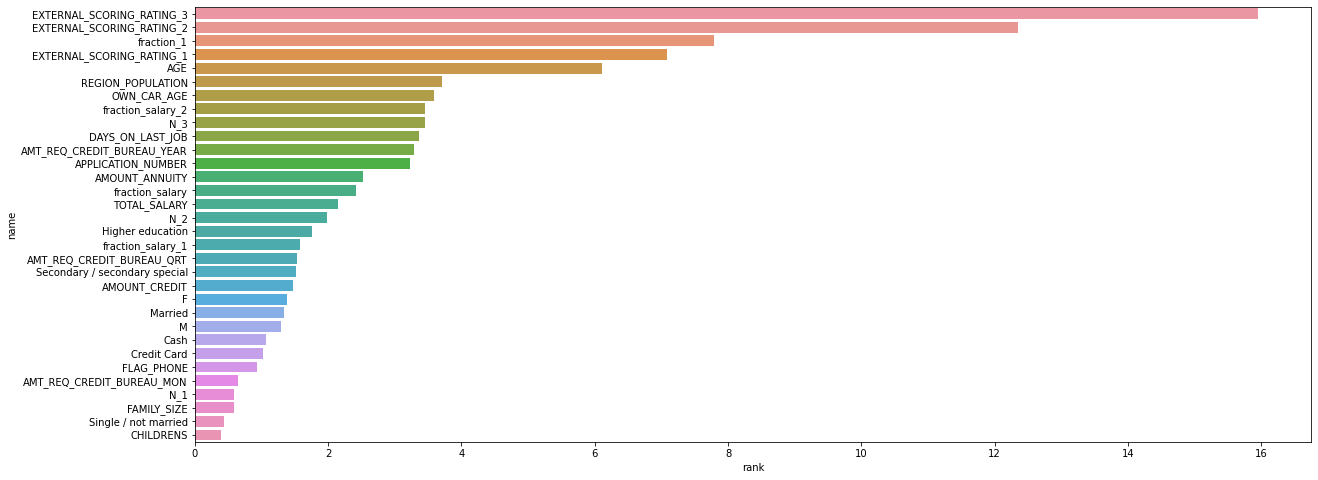

In [404]:
rank_feature_importances_ = model.feature_importances_

train_feature_importances = pd.DataFrame(rank_feature_importances_, train_data.columns)
train_feature_importances.reset_index(inplace=True)
train_feature_importances = train_feature_importances.rename(columns={'index': 'name', 0: 'rank'}) 
train_feature_importances.sort_values(by="rank", inplace=True, ascending = False)

plt.figure(figsize = ([20,8]))
sns.barplot(train_feature_importances['rank'], train_feature_importances['name'])

In [405]:
train_feature_importances['name']

13        EXTERNAL_SCORING_RATING_3
12        EXTERNAL_SCORING_RATING_2
28                       fraction_1
11        EXTERNAL_SCORING_RATING_1
6                               AGE
5                 REGION_POPULATION
8                       OWN_CAR_AGE
27                fraction_salary_2
31                              N_3
7                  DAYS_ON_LAST_JOB
16       AMT_REQ_CREDIT_BUREAU_YEAR
0                APPLICATION_NUMBER
4                    AMOUNT_ANNUITY
25                  fraction_salary
2                      TOTAL_SALARY
30                              N_2
21                 Higher education
26                fraction_salary_1
15        AMT_REQ_CREDIT_BUREAU_QRT
22    Secondary / secondary special
3                     AMOUNT_CREDIT
19                                F
23                          Married
20                                M
17                             Cash
18                      Credit Card
9                        FLAG_PHONE
14        AMT_REQ_CREDIT_BUR

In [406]:
#x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.30)

In [407]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 600,
    "reg_lambda": 100,
    "max_depth": 7,
    "gamma": 10,
    "nthread": 6,
    "seed": 27,
    'colsample_bytree': 0.555,
    'min_child_weights': 369
}

In [408]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [409]:
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=10,
)

[11:26:56] WARNING: ../src/learner.cc:516: 
Parameters: { min_child_weights, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.68604	valid-auc:0.68588
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.72391	valid-auc:0.71940
[20]	train-auc:0.73856	valid-auc:0.73247
[30]	train-auc:0.74772	valid-auc:0.74036
[40]	train-auc:0.75557	valid-auc:0.74717
[50]	train-auc:0.76142	valid-auc:0.75228
[60]	train-auc:0.76460	valid-auc:0.75456
[70]	train-auc:0.76761	valid-auc:0.75708
[80]	train-auc:0.77046	valid-auc:0.75921
[90]	train-auc:0.77325	valid-auc:0.76063
[100]	train-auc:0.77531	valid-auc:0.76255
[110]	train-auc:0.77773	valid-auc:0.76459
[120]	train-a

In [410]:
train_score = roc_auc_score(y_train, model_xgb.predict(dtrain))
valid_score = roc_auc_score(y_valid, model_xgb.predict(dvalid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")
#Train-score: 0.808, Valid-score: 0.787)

Train-score: 0.805, Valid-score: 0.785)


In [411]:
y_pred_test_x = model_xgb.predict(xgb.DMatrix(data=test_data))
result_test_x = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_x.flatten(),})
result_test_x.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.225149
1,123456549,0.745187
2,123428178,0.506346
3,123619984,0.358853
4,123671104,0.077620


In [412]:
#filename = 'Vodorezova.csv'
#result_test_x.to_csv(filename, index=None)

In [413]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 600,
    "n_jobs": 6,
    "seed": 27,
}

In [414]:
dtrain = lgbm.Dataset(
    data=x_train, label=y_train
)
dvalid = lgbm.Dataset(
    data=x_valid, label=y_valid
)

model_lgbm = lgbm.train(
    params=params,
    train_set=dtrain,
    num_boost_round=600,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37399, number of negative: 70805
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3862
[LightGBM] [Info] Number of data points in the train set: 108204, number of used features: 32
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345634 -> initscore=-0.638286
[LightGBM] [Info] Start training from score -0.638286
Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.706264	valid_1's auc: 0.701721
[20]	training's auc: 0.710511	valid_1's auc: 0.705907
[30]	training's auc: 0.712784	valid_1's auc: 0.707963
[40]	training's auc: 0.715542	valid_1's auc: 0.71032
[5

In [415]:
train_score = roc_auc_score(y_train, model_lgbm.predict(x_train))
valid_score = roc_auc_score(y_valid, model_lgbm.predict(x_valid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.78, Valid-score: 0.768)

Train-score: 0.779, Valid-score: 0.764)


In [416]:
y_pred_test_l = model_lgbm.predict(test_data)
result_test_l = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_l.flatten(),})
result_test_l.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.203586
1,123456549,0.668963
2,123428178,0.539995
3,123619984,0.357380
4,123671104,0.082771


In [417]:
#filename = 'Vodorezova.csv'
#result_test_l.to_csv(filename, index=None)

In [418]:
result_test.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.245410
1,123456549,0.717962


In [419]:
result_test_x.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.225149
1,123456549,0.745187


In [420]:
result_test_l.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.203586
1,123456549,0.668963


In [421]:
res = result_test.copy()
res['TARGET'] = (result_test['TARGET'] + result_test_x['TARGET'] + result_test_l['TARGET']) / 3
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.224715
1,123456549,0.710704


In [422]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.73179

In [423]:
rfc = RandomForestClassifier(n_estimators=600, max_depth = 9) 

In [424]:
rfc.fit(x_train, y_train)  

RandomForestClassifier(max_depth=9, n_estimators=600)

In [425]:
train_score = roc_auc_score(y_train, rfc.predict_proba(x_train)[:,1])
valid_score = roc_auc_score(y_valid, rfc.predict_proba(x_valid)[:,1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.745, Valid-score: 0.733)   500 7
#Train-score: 0.789, Valid-score: 0.768)   600 9

Train-score: 0.791, Valid-score: 0.77)


In [426]:
y_pred_test_r = rfc.predict_proba(test_data)[:,1]
result_test_r = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_r.flatten(),})
result_test_r.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.255162
1,123456549,0.588602
2,123428178,0.527014
3,123619984,0.354290
4,123671104,0.119095


In [427]:
#filename = 'Vodorezova.csv'
#result_test_r.to_csv(filename, index=None)
# 71327

In [428]:
gbc = GradientBoostingClassifier()

In [429]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [430]:
train_score = roc_auc_score(y_train, gbc.predict_proba(x_train)[:,1])
valid_score = roc_auc_score(y_valid, gbc.predict_proba(x_valid)[:,1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.743, Valid-score: 0.738)

Train-score: 0.743, Valid-score: 0.738)


In [431]:
y_pred_test_g = gbc.predict_proba(test_data)[:,1]
result_test_g = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_g.flatten(),})
result_test_g.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.254278
1,123456549,0.641464
2,123428178,0.493874
3,123619984,0.357421
4,123671104,0.089625


In [432]:
#filename = 'Vodorezova.csv'
#result_test_k.to_csv(filename, index=None)
# 71327

In [433]:
res = result_test.copy()
res['TARGET'] = (result_test['TARGET'] + result_test_x['TARGET'] + result_test_l['TARGET'] + result_test_r['TARGET'] + result_test_g['TARGET'] ) / 5
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.236717
1,123456549,0.672435


In [434]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.72942

In [437]:
res = result_test.copy()
res['TARGET'] = 0.2 * result_test['TARGET'] + 0.4 * result_test_x['TARGET'] + 0.2 * result_test_l['TARGET'] + 0.1 * result_test_r['TARGET'] + 0.1 * result_test_g['TARGET']
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.230803
1,123456549,0.698466


In [438]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.73133

In [439]:
res = result_test.copy()
res['TARGET'] = 0.3 * result_test['TARGET'] + 0.5 * result_test_x['TARGET'] + 0.2 * result_test_l['TARGET']
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.226914
1,123456549,0.721775


In [440]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.73175

In [443]:
res = result_test.copy()
res['TARGET'] = 0.3 * result_test['TARGET'] + 0.7 * result_test_x['TARGET']
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.233253
1,123456549,0.734297


In [444]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.73174

In [435]:
stop

NameError: name 'stop' is not defined

In [ ]:
test_data_res = result_test.copy()
test_data_res['cat'] = test_data_res['TARGET']
test_data_res['xgb'] = result_test_x['TARGET']
test_data_res['lgbm'] = result_test_l['TARGET']
test_data_res.head(2)

In [ ]:
test_data_res = test_data_res.drop(['TARGET'], axis = 'columns')
test_data_res

In [ ]:
train_data_cat = model.predict(train_data, prediction_type =  "Probability")[:,1]
result_train_cat = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_cat.flatten(),})
result_train_cat.head()

In [ ]:
train_data_xgb = model_xgb.predict(xgb.DMatrix(data=train_data))
result_train_xgb = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_xgb.flatten(),})
result_train_xgb.head()

In [ ]:
train_data_lgbm = model_lgbm.predict(train_data)
result_train_lgbm = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_lgbm.flatten(),})
result_train_lgbm.head()

In [ ]:
train_data_res = result_train_cat.copy()
train_data_res['cat'] = train_data_res['TARGET']
train_data_res['xgb'] = result_train_xgb['TARGET']
train_data_res['lgbm'] = result_train_lgbm['TARGET']
train_data_res.head(2)

In [ ]:
train_data_res = train_data_res.drop(['TARGET'], axis = 'columns')
train_data_res

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data_res, train_target, test_size=0.30)

In [ ]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 600,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=10,
)

In [ ]:
train_score = roc_auc_score(y_train, model_xgb.predict(dtrain))
valid_score = roc_auc_score(y_valid, model_xgb.predict(dvalid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")
#Train-score: 0.815, Valid-score: 0.816)

In [ ]:
y_pred_test_x = model_xgb.predict(xgb.DMatrix(data=test_data_res))
result_test_x = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_x.flatten(),})
result_test_x.head()

In [ ]:
filename = 'Vodorezova.csv'
result_test_x.to_csv(filename, index=None)
# 72276